# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pathlib import Path

RAW_DATA = Path('/Users/wyao/Downloads/CaseSTudy_2_data.xlsx')
DATA_SHEET_NAME = 'GA_paid_search'
DTYPE = {
    'Visitor_Identifier':     object,
    'Channel_Grouping':       object,
    'device_category':        object,
    'non_shopper':            object,
    'Unique_Views2_BU':       object,
    'user_type':              object}

sns.set(style="darkgrid", palette="pastel")

In [2]:
raw_df = pd.read_excel(RAW_DATA, sheet_name=DATA_SHEET_NAME, dtype=DTYPE)
# raw_df.info()
# raw_df.nunique()

In [3]:
drop = ['Channel_Grouping']
raw_df.drop(columns=drop, inplace=True)

rename = {
    'Visitor_Identifier':    'Visitor_ID',   
    'Lead _Form_submission': 'Lead_Form_submission'}

raw_df.rename(columns=rename, inplace=True)

# convert to categorical column
raw_df['Visitor_ID'] = raw_df.loc[:,'Visitor_ID'].astype('category')
raw_df['device_category'] = raw_df.loc[:,'device_category'].astype('category')
raw_df['non_shopper'] = raw_df.loc[:,'non_shopper'].astype('category')
raw_df['user_type'] = raw_df.loc[:,'user_type'].astype('category')


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49420 entries, 0 to 49419
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Visitor_ID             49420 non-null  category
 1   Avg_Session_Duration   49420 non-null  float64 
 2   avg_time_on_page       49420 non-null  float64 
 3   device_category        49420 non-null  category
 4   non_shopper            49420 non-null  category
 5   Pages_Session          49420 non-null  float64 
 6   pageviews              49420 non-null  int64   
 7   Session_1plus_minute   49420 non-null  int64   
 8   Session_3plus_minutes  49420 non-null  int64   
 9   Session_3plus_pages    49420 non-null  int64   
 10  Session_5plus_minutes  49420 non-null  int64   
 11  Session_5plus_pages    49420 non-null  int64   
 12  session_duration       49420 non-null  int64   
 13  sessions               49420 non-null  int64   
 14  Unique_Views2_BU       49420 non-null 

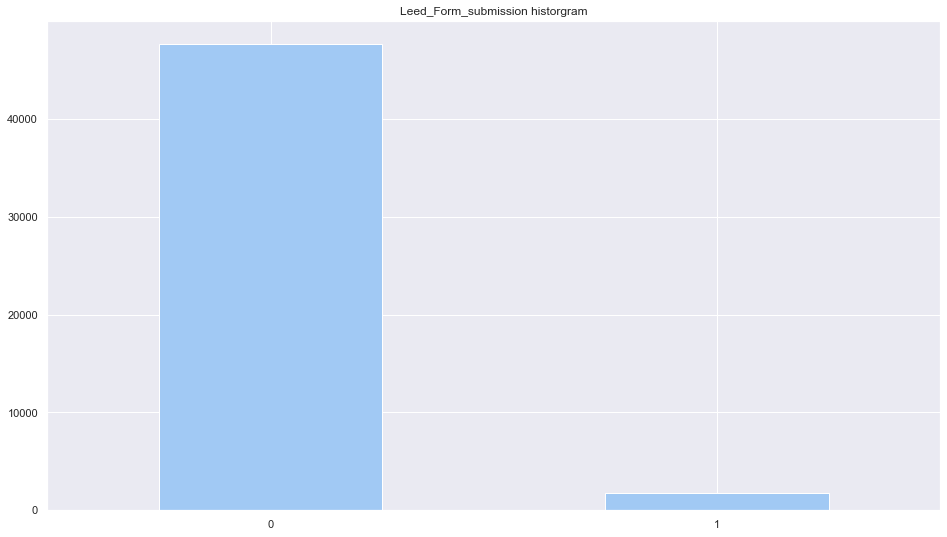

In [5]:
raw_df['Lead_Form_submission'].value_counts().plot(kind='bar', rot=0, figsize=(16,9));
plt.title('Leed_Form_submission historgram');

In [6]:
raw_df_num = raw_df.select_dtypes(include = ['float64', 'int64'])
# for col in raw_df_num:
#     fig, ax = plt.subplots(figsize=(8,8))
#     ax.hist(x=raw_df_num[col], align='mid',bins=20)
#     plt.title(col)
#     plt.tight_layout()
#     plt.show()

raw_df_cat = raw_df.select_dtypes(include = ['category'])
raw_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49420 entries, 0 to 49419
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Visitor_ID       49420 non-null  category
 1   device_category  49420 non-null  category
 2   non_shopper      49420 non-null  category
 3   user_type        49420 non-null  category
dtypes: category(4)
memory usage: 1.9 MB


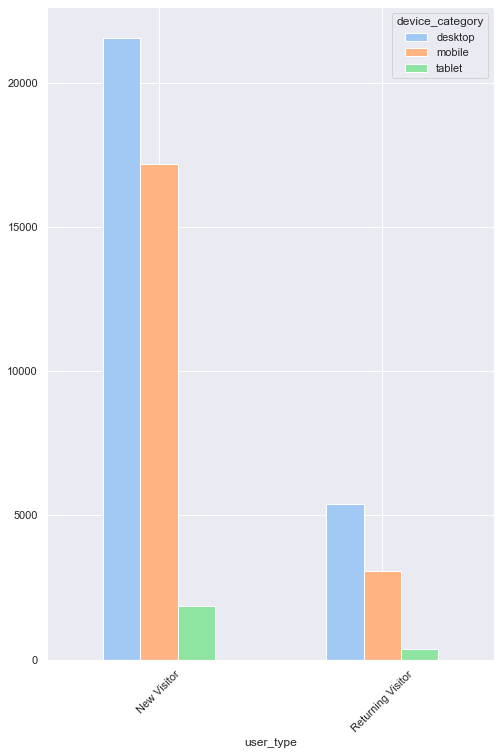

In [7]:
cross_table = pd.crosstab(index=raw_df["user_type"], 
                          columns=raw_df["device_category"])
cross_table.plot(
    kind="bar", 
    figsize=(8,12),
    stacked=False,
    rot=45);

Text(2.835000000000001, 0.5, 'Lead Form Submission Probability')

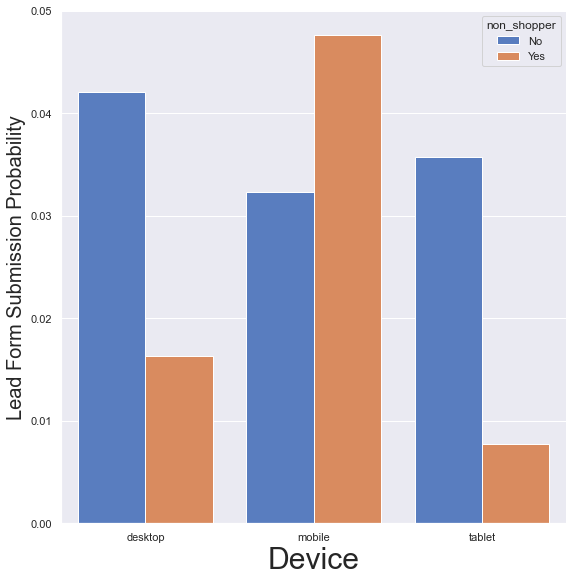

In [8]:
# fig, g = plt.subplots(figsize=(8,8))
g=sns.catplot(x="device_category", y="Lead_Form_submission", hue="non_shopper", data=raw_df,
            height=8, kind="bar", palette="muted", ci=None, legend_out=False)
g.ax.set_title("",fontsize=50)
g.ax.set_xlabel("Device",fontsize=30)
g.ax.set_ylabel("Lead Form Submission Probability",fontsize=20)
# g.tick_params(labelsize=15)
# sns.plt.show()

# Numerical

In [9]:
raw_df_num.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.98,0.985, 0.99,0.995])

,Avg_Session_Duration,avg_time_on_page,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Lead_Form_submission
count,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000
mean,38.668704,19.474152,1.284176,1.655382,0.131263,0.064265,0.037637,0.044699,0.013031,65.874788,1.221307,0.036524
std,145.379037,100.682034,0.907565,3.771735,0.501712,0.389254,0.283146,0.336092,0.140361,452.519804,2.318114,0.187591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000
80%,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000
90%,65.000000,32.500000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,78.000000,1.000000,0.000000
95%,160.000000,89.667000,3.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,197.000000,2.000000,0.000000


In [10]:
tmp = raw_df_num.drop(columns=['Lead_Form_submission'])

sqrt_tmp = tmp.apply(np.sqrt, axis=0)

sqrt_tmp.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.98,0.985, 0.99,0.995])

,Avg_Session_Duration,avg_time_on_page,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions
count,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000,49420.000000
mean,3.239376,1.431410,1.098583,1.171411,0.117430,0.055376,0.032067,0.037723,0.011847,3.699040,1.058369
std,5.308081,4.174395,0.278014,0.532150,0.342747,0.247387,0.191335,0.208030,0.113539,7.224469,0.318064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.477226,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.477226,1.000000
80%,5.477226,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.477226,1.000000
90%,8.062258,5.700877,1.414214,1.732051,1.000000,0.000000,0.000000,0.000000,0.000000,8.831761,1.000000
95%,12.649111,9.469266,1.732051,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,14.035669,1.414214


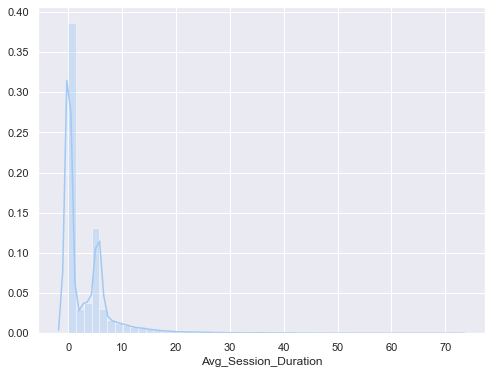

In [11]:
col = 'Avg_Session_Duration'
plot_df=sqrt_tmp
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(plot_df['Avg_Session_Duration'], ax=ax);

In [12]:
# cap numerical variables with 99.5-percentile
num_df_cap = np.minimum(
    sqrt_tmp, np.percentile(sqrt_tmp, 99.5, axis=0))

raw_df_cap = pd.concat([raw_df_cat, num_df_cap, raw_df[['Lead_Form_submission']]], axis=1)

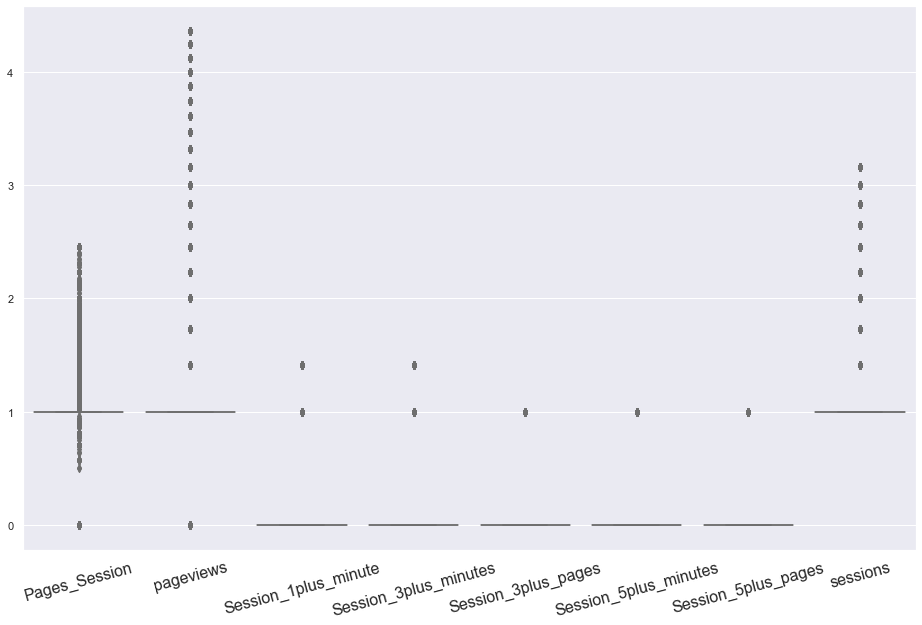

In [13]:
group1 = ['Avg_Session_Duration', 'avg_time_on_page', 'session_duration']
group2 = ['Pages_Session', 'pageviews', 'Session_1plus_minute', 
          'Session_3plus_minutes', 'Session_3plus_pages', 
          'Session_5plus_minutes', 'Session_5plus_pages', 'sessions']

fig, ax = plt.subplots(figsize=(16,10))

ax = sns.boxplot(data=num_df_cap[group2],ax=ax);
ax.set_xticklabels(ax.get_xticklabels(),rotation=15, fontsize=16);

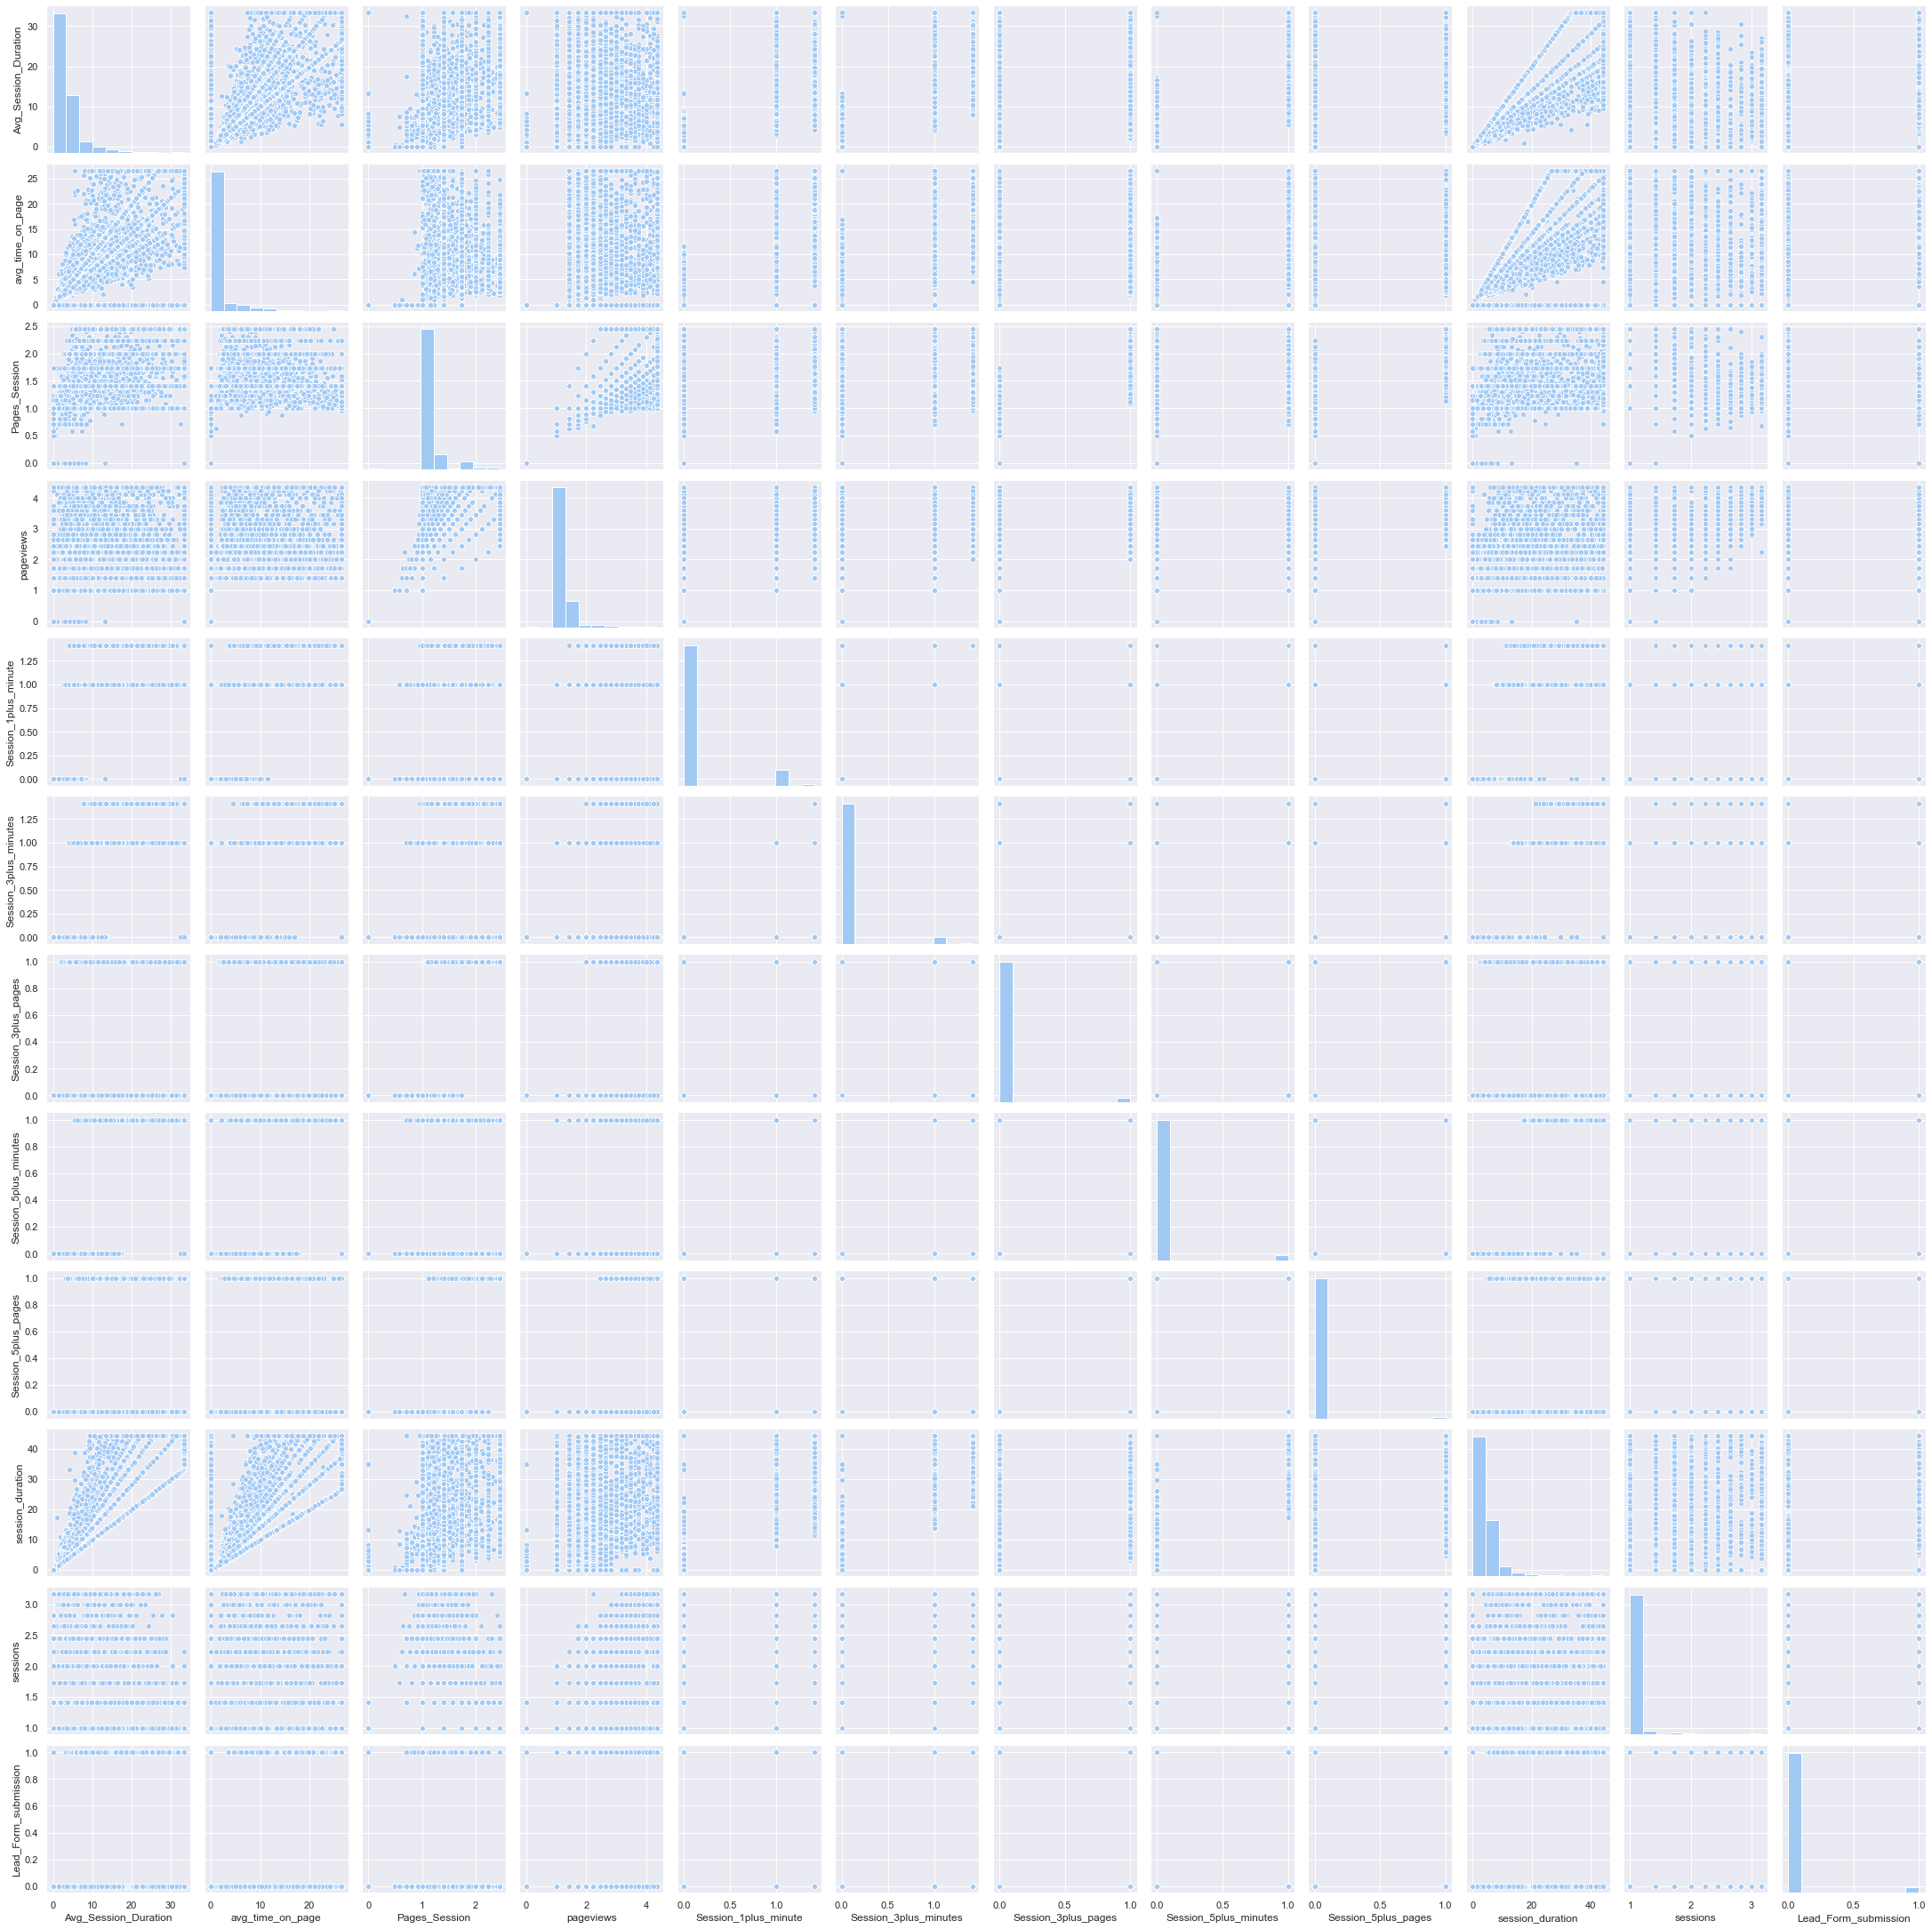

In [14]:
pp = sns.pairplot(pd.concat([num_df_cap, raw_df[['Lead_Form_submission']]], axis=1))

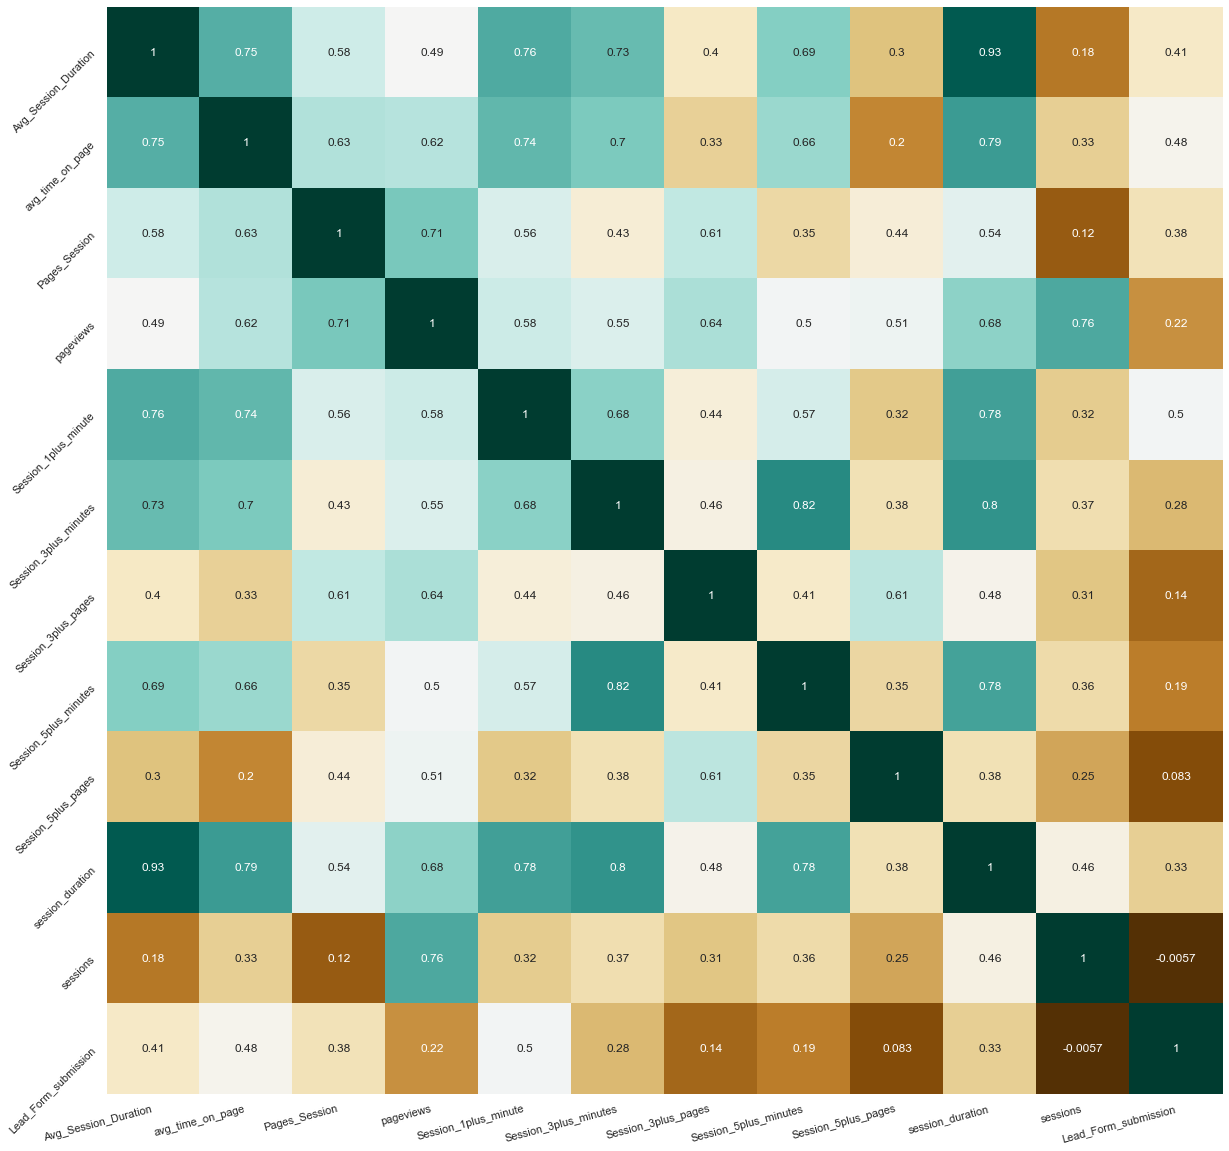

In [15]:
plt.figure(figsize=(20,20))
c= raw_df_cap.corr()
hm = sns.heatmap(c,cmap="BrBG",annot=True, cbar=False)
# c
hm.set_xticklabels(hm.get_xticklabels(), rotation=15, horizontalalignment='right');
hm.set_yticklabels(hm.get_yticklabels(), rotation=45, horizontalalignment='right');

In [16]:
num_col_list = num_df_cap.columns

print(num_col_list)

Index(['Avg_Session_Duration', 'avg_time_on_page', 'Pages_Session',
       'pageviews', 'Session_1plus_minute', 'Session_3plus_minutes',
       'Session_3plus_pages', 'Session_5plus_minutes', 'Session_5plus_pages',
       'session_duration', 'sessions'],
      dtype='object')


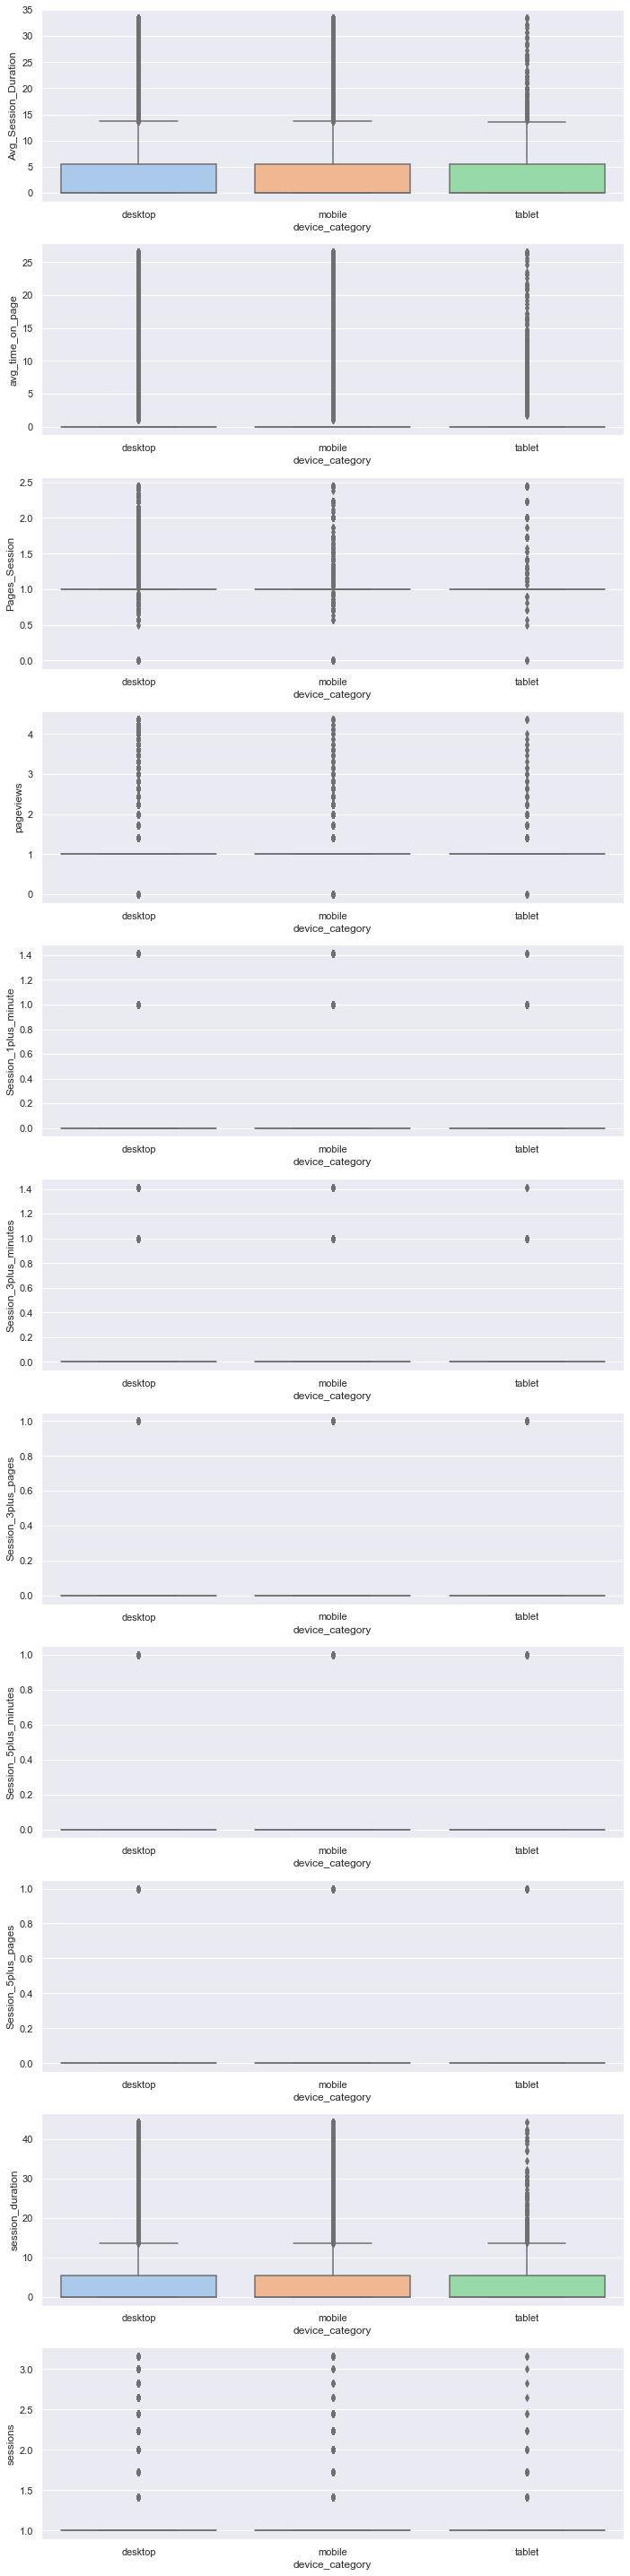

In [17]:
# device_category
# non_shopper
# user_type  

fig, axes = plt.subplots(nrows=len(num_col_list), ncols=1, figsize=(10,40),sharex=True)

for i, col in enumerate(num_col_list):
    sorted_nb = raw_df_cap.groupby(['device_category'])[col].median()#.head(10)#.sort_values()
    sns.boxplot(x=raw_df_cap['device_category'], y=raw_df_cap[col], order=list(sorted_nb.index),ax=axes[i]);

    axes[i].tick_params(axis='both', which='both',labelbottom=True)

    for tick in axes[i].get_xticklabels():
        tick.set_visible(True)
    
plt.tight_layout()
plt.show()

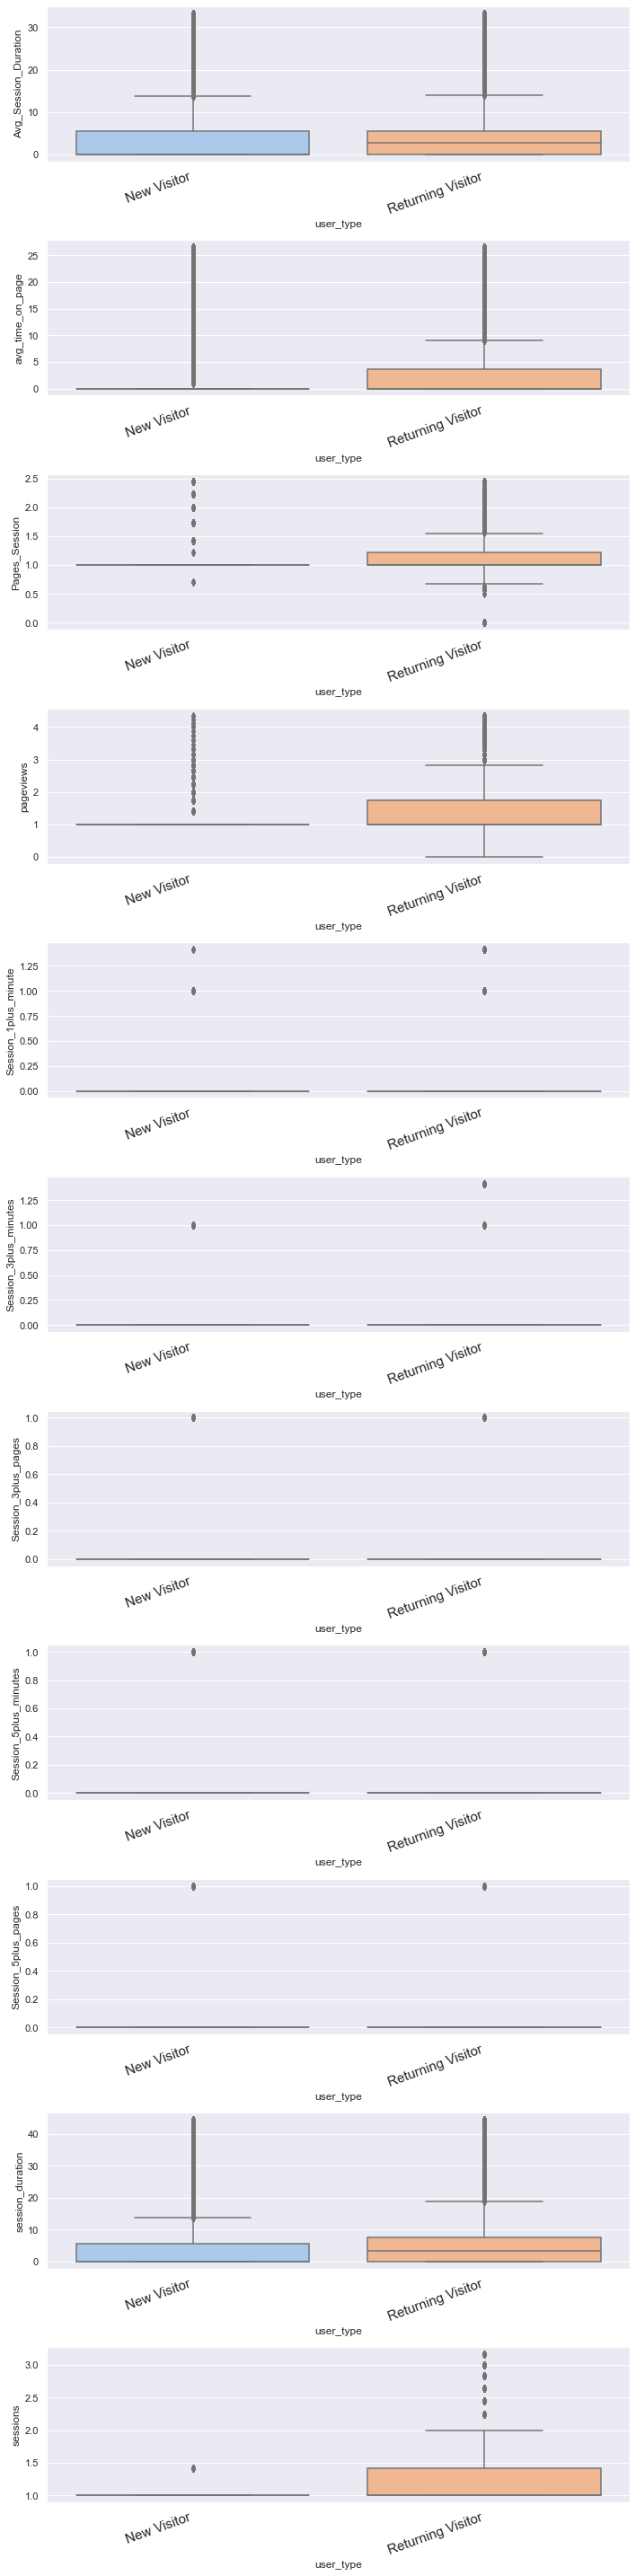

In [18]:
fig, axes = plt.subplots(nrows=len(num_col_list), ncols=1, figsize=(10,40),sharex=True)

for i, col in enumerate(num_col_list):
    sorted_nb = raw_df_cap.groupby(['user_type'])[col].median()#.head(10)#.sort_values()
    sns.boxplot(x=raw_df_cap['user_type'], y=raw_df_cap[col], order=list(sorted_nb.index),ax=axes[i]);
    
    axes[i].tick_params(axis='both', which='both',labelbottom=True)
    
    for tick in axes[i].get_xticklabels():
        tick.set_visible(True)
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), 
                            rotation=20, 
                            horizontalalignment='right',
                            fontsize=15);
    
plt.tight_layout()
plt.show()

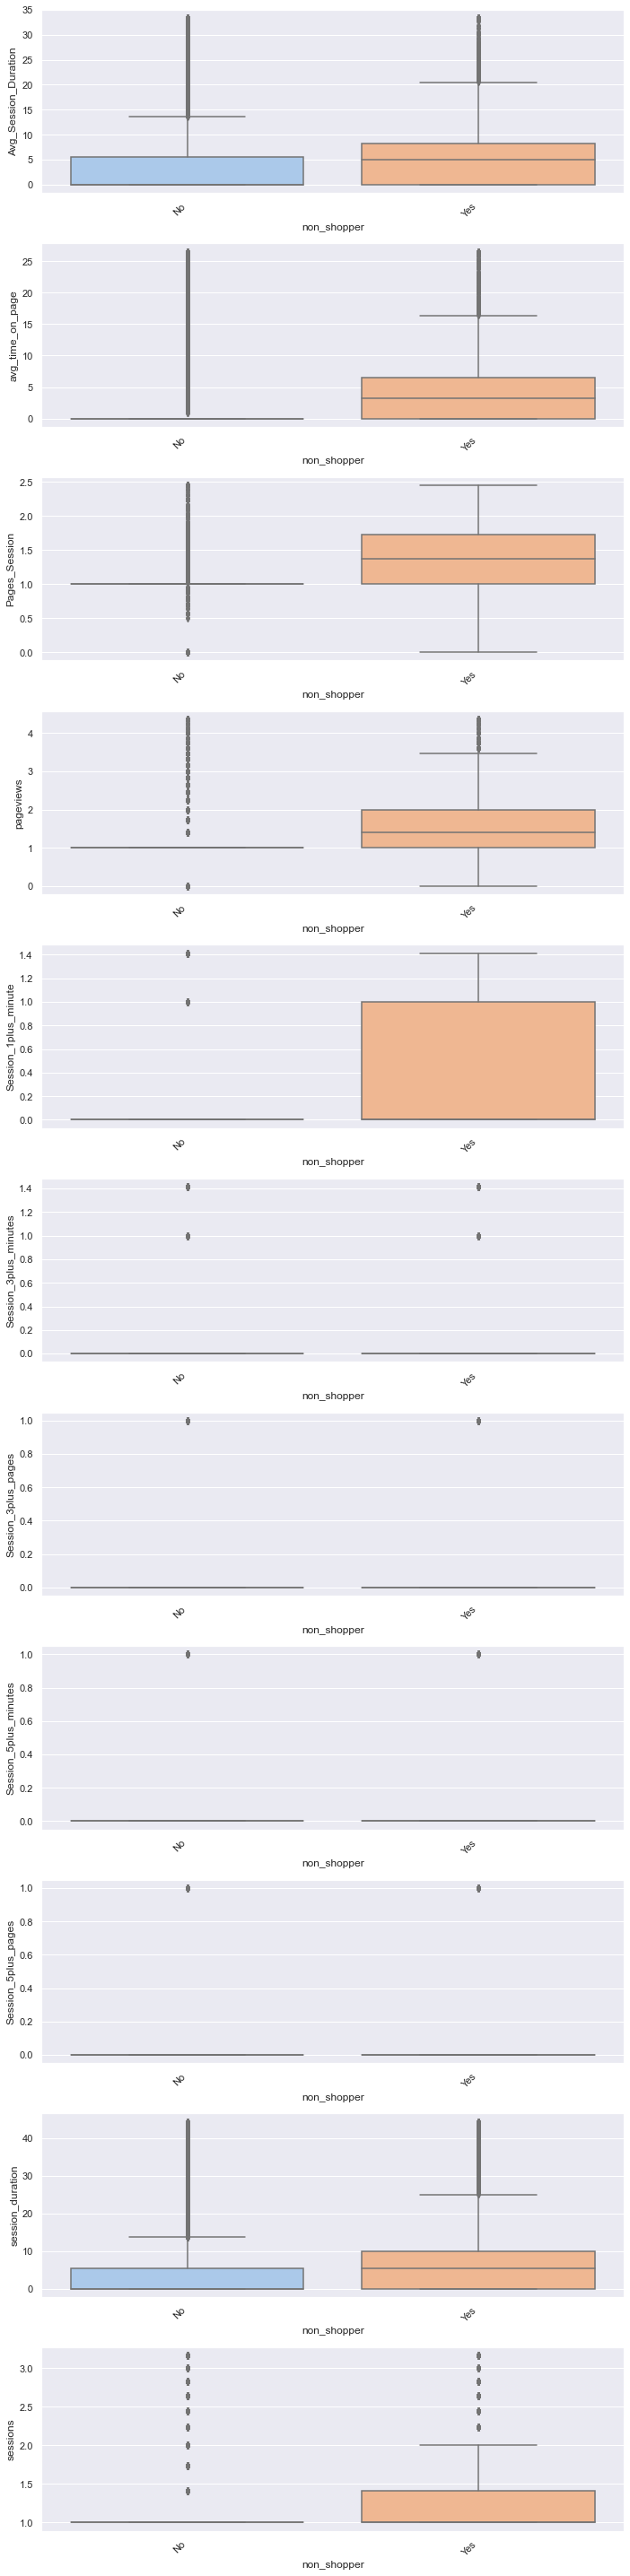

In [19]:
fig, axes = plt.subplots(nrows=len(num_col_list), ncols=1, figsize=(10,40),sharex=True)

for i, col in enumerate(num_col_list):
    sorted_nb = raw_df_cap.groupby(['non_shopper'])[col].median()#.head(10)#.sort_values()
    sns.boxplot(x=raw_df_cap['non_shopper'], y=raw_df_cap[col], order=list(sorted_nb.index),ax=axes[i]);
    
    axes[i].tick_params(axis='both', which='both',labelbottom=True)
    
    for tick in axes[i].get_xticklabels():
        tick.set_visible(True)
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), 
                            rotation=45, 
                            horizontalalignment='right');
    
plt.tight_layout()
plt.show()

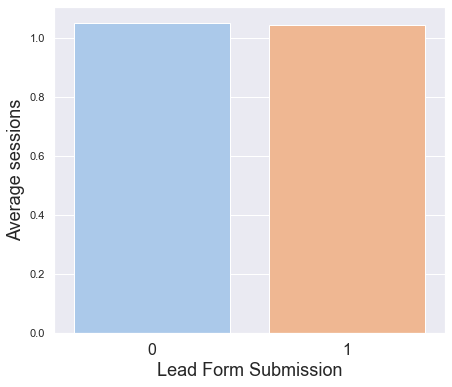

In [20]:
# 'Avg_Session_Duration', 'avg_time_on_page', 'Pages_Session',
# 'pageviews', 'Session_1plus_minute', 'Session_3plus_minutes',
# 'Session_3plus_pages', 'Session_5plus_minutes', 'Session_5plus_pages',
# 'session_duration', 'sessions'

ycol = 'sessions'

groupby = raw_df_cap.groupby('Lead_Form_submission').mean()
groupby.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(7,6))
g=sns.barplot(x='Lead_Form_submission', y=ycol, data=groupby, ax=ax);
g.set_xticklabels(g.get_xticklabels(),rotation=0, fontsize=16);
plt.xlabel('Lead Form Submission', fontsize=18)
plt.ylabel(f'Average {ycol}', fontsize=18)
plt.show()

# Modeling

In [66]:
from numpy import mean
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import average_precision_score

# Precision = TruePositives / (TruePositives + FalsePositives)
# Recall = TruePositives / (TruePositives + FalseNegatives)

In [67]:
model_df = raw_df_cap.drop(columns=['Visitor_ID'])

X = model_df.drop(columns=['Lead_Form_submission'])
y = model_df[['Lead_Form_submission']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size =0.3, random_state=74, shuffle=True, 
    stratify=y)

numeric_features = [
    'Avg_Session_Duration', 'avg_time_on_page', 'Pages_Session',
    'pageviews', 'Session_1plus_minute', 'Session_3plus_minutes',
    'Session_3plus_pages', 'Session_5plus_minutes', 'Session_5plus_pages',
    'session_duration', 'sessions']

numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())])

categorical_features = [
    'device_category', 'non_shopper', 'user_type']
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocesssor = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Decision Tree

In [73]:
from sklearn import tree

In [88]:
clf_dt = tree.DecisionTreeClassifier(splitter='best', max_depth=5,criterion='entropy')
# Training the Decision Tree
# clf.fit(X_train_under, y_train_under)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=74)
scores = cross_val_score(clf_dt, X_train_under, y_train_under, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
clf_dt.fit(X_train_under, y_train_under)
print('train F1 Score: %.3f' % score)

y_pred_prob = clf_dt.predict_proba(X_test)
y_pred = clf_dt.predict(X_test)

# y_score = clf_dt.decision_function(X_test)

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
# roc_auc = auc(fpr, tpr)

train F1 Score: 0.947


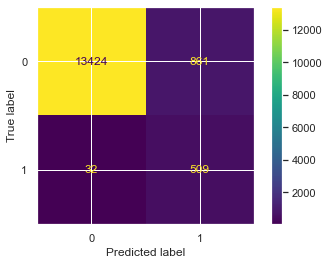

In [89]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

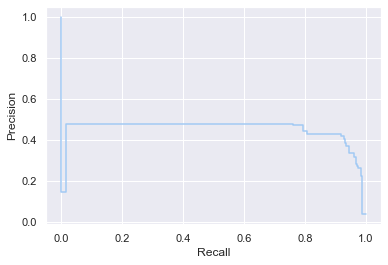

In [90]:
prec, recall, _ = precision_recall_curve(
    y_test, y_pred_prob[:,1],
    pos_label=clf_dt.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

avg_prec_score = average_precision_score(y_test, y_pred_prob[:,1])
f1 = f1_score(y_test, y_pred)

In [91]:
print(f'f1 score: {f1}, Avg. Precision score: {avg_prec_score}')

f1 score: 0.532705389848247, Avg. Precision score: 0.4489778538218264


# Logistic regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [99]:
clf_logi = LogisticRegression(penalty='l2', random_state=74, n_jobs=-1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=74)
scores = cross_val_score(clf_dt, X_train_under, y_train_under, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
clf_logi.fit(X_train_under, y_train_under)
print('train F1 Score: %.3f' % score)

y_pred_prob = clf_logi.predict_proba(X_test)
y_pred = clf_logi.predict(X_test)

train F1 Score: 0.947


/Users/wyao/PycharmProjects/data_analysis/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


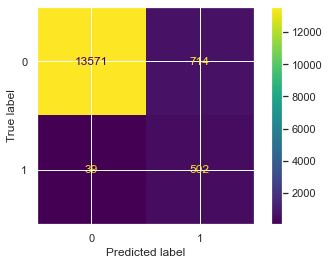

In [100]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

f1 score: 0.5714285714285714, Avg. Precision score: 0.4768146416960084


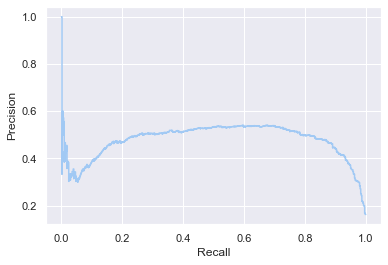

In [102]:
prec, recall, _ = precision_recall_curve(
    y_test, y_pred_prob[:,1],
    pos_label=clf_logi.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

avg_prec_score = average_precision_score(y_test, y_pred_prob[:,1])
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1}, Avg. Precision score: {avg_prec_score}')

# Linear SVM

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
clf_rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=5, n_jobs=-1, random_state=74)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=74)
scores = cross_val_score(clf_dt, X_train_under, y_train_under, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
clf_rf.fit(X_train_under, y_train_under)
print('train F1 Score: %.3f' % score)

y_pred_prob = clf_rf.predict_proba(X_test)
y_pred = clf_rf.predict(X_test)

/Users/wyao/PycharmProjects/data_analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


train F1 Score: 0.948


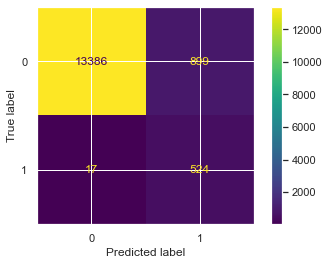

In [130]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

f1 score: 0.5336048879837068, Avg. Precision score: 0.6195035837142


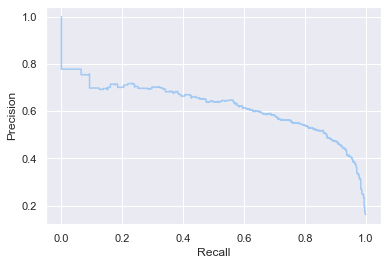

In [131]:
prec, recall, _ = precision_recall_curve(
    y_test, y_pred_prob[:,1],
    pos_label=clf_logi.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

avg_prec_score = average_precision_score(y_test, y_pred_prob[:,1])
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1}, Avg. Precision score: {avg_prec_score}')